# Gráficos: linear, semi-log, log-log e fit de funções lineares

A prática 2 ilustra muito bem como gráficos permitem apresentar de maneira eficaz a relação entre duas grandezas físicas. Gráficos nos ajudam a estudar fenômenos e predizer comportamentos.

Os experimentos da prática 2 servem para analisar a deformação de uma barra metálica quando sujeita a uma força em uma das suas extremidades. Diversos sistemas se comportam como

$$\vec{F} = k \vec{x},$$

onde $\vec{F} = F \hat{x}$ é o vetor que descreve a força (amplitude e direção), e $\vec{x} = x \hat{x}$ dá a deformação daquele corpo na direção $\hat{x}$ na qual a força foi aplicada. 


Esse tipo de relação é linear. Assim, se fizermos o gráfico $F$ vs $x$ teremos uma reta com coeficiente angular (inclinação) igual a $k$.

Para a barra do experimento, de comprimento $L$, largura $b$ e espessura $d$, temos

$$ F = \underbrace{\left( E \frac{d^3 b}{4L^3} \right)}_{k} x,$$

onde $E$ é o módulo de Young do material do qual a barra é constituída.


A prática foi dividida em duas partes para estudarmos a deflexão $x$

1) variando a força $F$ aplicada mantendo o comprimento $L$ fixo.

2) variando o comprimento $L$ e mantendo a força $F$ fixa.



Em ambas as partes, estudaremos a relação entre a deflexão $L$ e o parâmetro de controle ($F$ ou $L$) através de gráficos. Aprenderemos como encontrar o coeficiente linear $k$ a partir dos dados em escala linear e log-log. 


## Bibliotecas Python para tabelas, gráficos e linearização

In [1]:
# biblioteca do python para tabelas e dados
import pandas as pd

# biblioteca do python de cálculo numérico e álgebra linear
import numpy as np

# biblioteca do python para algarismos significativos 
import sigfig

# biblioteca do python para gráficos
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font)
%matplotlib inline

# biblioteca do python para análise de dados: regressão linear
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

## Parte 1) Deformação em função da força aplicada

Na primeira parte da prática, analisaremos como a deflexão $x$ se relaciona com a força $F$, mantendo o comprimento fixo.  Para a barra em questão, temos a seguinte relação

$$ F = \left( E \frac{d^3 b}{4L^3} \right) x,$$.




## Parte 2) Deformação em função da variação do comprimento


Na segunda parte da prática, analisaremos como a deflexão $x$ se relaciona com $L$ com $F$ fixo. 
Lembremos que 

$$ F = \left( E \frac{d^3 b}{4L^3} \right) x,$$

então, para $F$ constante 

$$ x = \underbrace{\left( \frac{4 F}{E d^3 b}\right)}_{\kappa} L^3$$

Nesta parte da prática, estudaremos a dependência de $x$ vs $L$ de duas formas:

### Graficando $Y = \log(x)$ vs $Y = \log(L)$ em uma escala log-log (papel log-log)

Neste caso, temos

$$ 
\begin{align}
\log(x) & = \log(\kappa L^3) \\
\log(x) & = \log(\kappa) + \log(L^3) \\
Y  & = \log(\kappa) + 3 X \\
\end{align}
$$

A última passagem da equação nos mostra que em uma escala logarítimica, observaremos uma reta $Y = \beta + \alpha X$ com coeficiente angular $\alpha = 3$ e linear $\beta = \log(\kappa)$. 

No caso da escala log-log, faremos um ajuste linear aos pontos e gostaríamos de observar um coeficiente próximo de $\alpha \sim 3$ dentro dos erros. 


### Graficando $Y = x$ vs $X = L^3$ em uma escala linear (papel milimetrado)

Neste caso, temos

$$ 
\begin{align}
Y & = \kappa X
\end{align}
$$

Aqui, a relação entre as variáveis $Y$ e $X$ é linear e $\kappa = \frac{4 F}{E d^3 b}$ é o coeficiente angular. 

No caso da escala linear, faremos um ajuste de uma reta aos pontos e vamos utilizar o valor de $\kappa$ para determinar o módulo de Young do material. 


### Exemplos de como proceder com gráficos e ajustar a reta com Python

Abaixo, ilustramos como graficar os resultados conforme pedido na prática e como obter os coeficientes angular e linear com seus respectivos erros. 

## Parte 1) Deformação em função da força aplicada

Abaixo, vamos montar as tabelas e os gráficos referentes à primeira parte da prática.

In [2]:
# lendo os dados e usando eles como tabela
dados1 = pd.read_csv('dados_pratica2_tabela1.csv')
dados1

,ID-Massa,$$m(\pm0.01g)$$,$$x(\pm0.1cm)$$
0,S,56.35,0.9
1,U8,94.65,1.5
2,T5,141.15,2.3
3,T2,194.32,3.1
4,N6,238.87,3.8
5,F7,281.56,4.5
6,I7,324.08,5.0
7,F4,372.80,5.8


In [120]:
dados1.keys()

Index(['ID-Massa', '$$m(\pm0.01g)$$', '$$x(\pm0.1cm)$$'], dtype='object')

### Tabela deformação $x$ em função da força peso $F$

In [3]:
# g=9.81 m/s^2, aceleracao (SI)
g=9.81

tabela1 = pd.DataFrame()
# Força em N
tabela1['$$F(\pm 0.0001N)$$'] = dados1['$$m(\pm0.01g)$$']*1e-3*g

# convertendo o x de cm para m (SI)
tabela1['$$x(\pm0.001m)$$'] = dados1['$$x(\pm0.1cm)$$']*1e-2
tabela1

,$$F(\pm 0.0001N)$$,$$x(\pm0.001m)$$
0,0.552794,0.009
1,0.928517,0.015
2,1.384682,0.023
3,1.906279,0.031
4,2.343315,0.038
5,2.762104,0.045
6,3.179225,0.050
7,3.657168,0.058


### Gráficos

Agora vamos fazer o gráfico de $F$ vs $x$


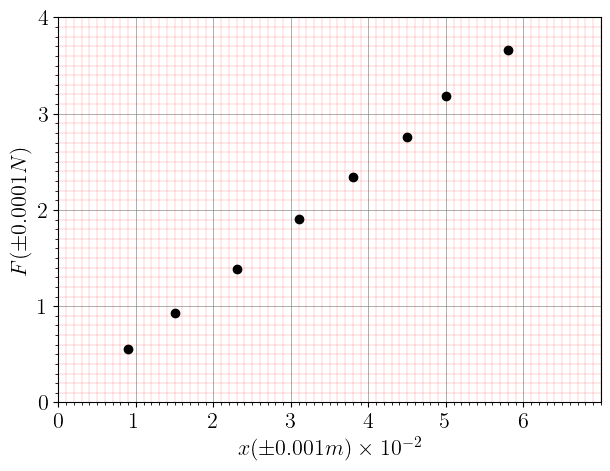

In [4]:
x = tabela1[['$$x(\pm0.001m)$$']].values.reshape(-1)
F = tabela1[['$$F(\pm 0.0001N)$$']].values.reshape(-1)


# figura
fig1, ax1 = plt.subplots(1,1, figsize=(7,5))
ax1.plot(x / 1e-2,F, 'ko')
ax1.set_xlabel(r'$x(\pm0.001 m) \times 10^{-2}$')
ax1.set_ylabel(r'$F(\pm0.0001N)$')
ax1.set_xticks(np.arange(0, 7, 1))
ax1.set_yticks(np.arange(0,5,1))
ax1.set_xlim(0,7)
ax1.set_yticks(np.linspace(0,4,41), minor=True)
ax1.set_xticks(np.linspace(0,7,71), minor=True)

ax1.grid(which='major', color='gray', linestyle='-', alpha=1, lw=0.45)
ax1.grid(which='minor', color='r', linestyle='-', alpha=0.5, lw=0.25)

### Ajuste linear

Agora, vamos fazer um ajuste linear para encontrar o coeficiente angular $k$ tal que 

$$F = k x$$.


Veja que poderíamos ter uma constante $F_0$ no caso de se para $x=0$ o $F$ não precisar ser 0, então uma forma mais refinada no modelo seria

$$ F = k x + F_0$$


In [5]:
# modelo
def model_Fkx(x,k, F0):
    return k*x + F0



# agora, usando a função curve_fit, calcularemos os coeficientes e seus erros
coefs_lin, cov_lin = curve_fit(model_Fkx, x, F)
coefs_err = np.sqrt(np.diag(cov_lin))

k = coefs_lin[0]
F0 = coefs_lin[1]
Ffit = k * x + F0

k_err = coefs_err[0]
F0_err = coefs_err[1]

# fitting y = ax + b
r2 = r2_score(Ffit, F)
print(f" R-quadrado (o que nos diz quão bom é o nosso modelo): {r2}\n")

print(f" F = kx + F0 ->{k}x + {F0} N \n")
print(f" k = {k} +- {k_err} N/m \n")
print(f" F0 = {F0} +- {F0_err} N \n")
print(f" OBS: Note que os coeficientes não foram arredondados conforme seu erro! \n ")


 R-quadrado (o que nos diz quão bom é o nosso modelo): 0.9990099807339997

 F = kx + F0 ->63.4643741730509x + -0.04472935656883863 N 

 k = 63.4643741730509 +- 0.8152225814338915 N/m 

 F0 = -0.04472935656883863 +- 0.030405999262752222 N 

 OBS: Note que os coeficientes não foram arredondados conforme seu erro! 
 


Agora vamos arredondar esses coeficientes considerando apenas um algarismo significativo


In [68]:
# algarismos significativos

k1s = sigfig.round(k_err, sigfigs=1)
F01s = sigfig.round(F0_err, sigfigs=1)

k1s = sigfig.round(str(k), str(k1s), notation='scientific', sep=tuple)
F01s = sigfig.round(str(F0), str(F01s), notation='scientific', sep=tuple)

print(f'k = {k1s[0]} +- {k1s[1]} N/m')
print(f'F0 = {F01s[0]} +- {F01s[1]} N')

k = 6.34E1 +- 0.08E1
F0 = -4E-2 +- 3E-2


Agora re-plotamos nossos dados com o modelo


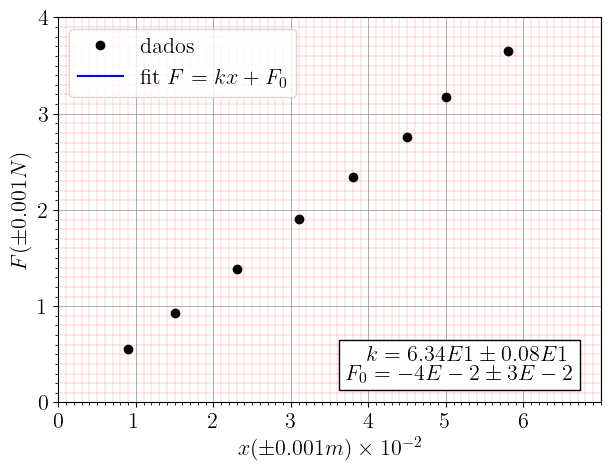

In [126]:
# graficando os pontos juntamente com o modelo

fig1lr, ax1lr = plt.subplots(1,1, figsize=(7,5))

ax1lr.plot(x / 1e-2, F, 'ko', label='dados')

xnew = np.linspace(0, 0.065, 51)
ax1lr.plot(xnew / 1e-2, xnew * k + F0, 'b-', label=r'fit $F = k x + F_0$')

ax1lr.set_xlabel(r'$x (\pm0.001m) \times 10^{-2}$')
ax1lr.set_ylabel(r'$F(\pm0.001 N)$')
ax1lr.set_xticks(np.arange(0, 7, 1))
ax1lr.set_yticks(np.arange(0,5,1))

ax1lr.set_xlim(0,7)
ax1lr.set_ylim(0,4)
ax1lr.set_yticks(np.linspace(0,4,41), minor=True)
ax1lr.set_xticks(np.linspace(0,7,71), minor=True)


ax1lr.grid(which='major', color='gray', linestyle='-', alpha=1, lw=0.45)
ax1lr.grid(which='minor', color='r', linestyle='-', alpha=0.5, lw=0.25)


ax1lr.text(0.95, 0.05, rf"$k={k1s[0]} \pm {k1s[1]}$ \\ $F_0={F01s[0]} \pm {F01s[1]}$".format(100, 20), transform=ax1lr.transAxes, ha='right', va='bottom', ma='right', bbox=dict(boxstyle="square",ec='k',fc='w',))


leg1lr = ax1lr.legend()



## Parte 2) Deformação em função do comprimento

Abaixo, vamos montar as tabelas e os gráficos referentes à segunda parte da prática.

In [127]:
# lendo os dados e usando eles como tabela
tabela2 = pd.read_csv('dados_pratica2_tabela2.csv')
tabela2

,$$L(\pm0.1cm)$$,$$x(\pm0.1cm)$$
0,27.0,5.6
1,25.0,4.5
2,23.0,3.7
3,21.0,2.8
4,19.0,2.1
5,17.0,1.7
6,15.0,1.2
7,13.0,0.7
8,11.0,0.5
9,9.0,0.2


In [13]:
tabela2.keys()

Index(['$$(L\pm0.1)cm$$', '$$(x\pm0.1)cm$$'], dtype='object')

In [128]:
# elevando a potência 3
tabela2['$$L^3(cm)$$'] = tabela2.apply(lambda row: row['$$L(\pm0.1cm)$$']**3, axis=1)

# calculando o erro L^3 -> 3 L^2 Delta L
# aqui já vamos usar o número certo de algarismos significativos
tabela2['$$\Delta L^3(cm)$$'] = tabela2.apply(lambda row: 3*row['$$L(\pm0.1cm)$$']**2*0.1, axis=1)

In [129]:
# tabela com os valores
tabela2

,$$L(\pm0.1cm)$$,$$x(\pm0.1cm)$$,$$L^3(cm)$$,$$\Delta L^3(cm)$$
0,27.0,5.6,19683.0,218.7
1,25.0,4.5,15625.0,187.5
2,23.0,3.7,12167.0,158.7
3,21.0,2.8,9261.0,132.3
4,19.0,2.1,6859.0,108.3
5,17.0,1.7,4913.0,86.7
6,15.0,1.2,3375.0,67.5
7,13.0,0.7,2197.0,50.7
8,11.0,0.5,1331.0,36.3
9,9.0,0.2,729.0,24.3


### Tabela com valores $L$, $x$ e $L^3$ com erro propagado

In [130]:
# arredondando os valores de L^3 e seu erro

L3_rounded = []
DL3_rounded = []
for l3, el3 in zip(tabela2['$$L^3(cm)$$'], tabela2['$$\Delta L^3(cm)$$']):
    xdx = sigfig.round(str(l3), str(el3),sep='tuple')
    L3_rounded.append( xdx[0] )
    DL3_rounded.append( xdx[1] )

tabela2['$$\Delta L^3(cm)$$'] = DL3_rounded
tabela2['$$L^3(cm)$$'] = L3_rounded

# nova tabela arredondada
tabela2

,$$L(\pm0.1cm)$$,$$x(\pm0.1cm)$$,$$L^3(cm)$$,$$\Delta L^3(cm)$$
0,27.0,5.6,19700,200
1,25.0,4.5,15600,200
2,23.0,3.7,12200,200
3,21.0,2.8,9300,100
4,19.0,2.1,6900,100
5,17.0,1.7,4910,90
6,15.0,1.2,3380,70
7,13.0,0.7,2200,50
8,11.0,0.5,1330,40
9,9.0,0.2,730,20


Agora vamos plotar o resultado. Primeiro, $x$ vs $L$ e depois $x$ vs $L^3$



### Gráficos

Agora vamos fazer os gráficos de $x$ vs $L$ em ecala linear, $x$ vs $L^3$ em escala linear e $x$ vs $L$ em escala log-log. 

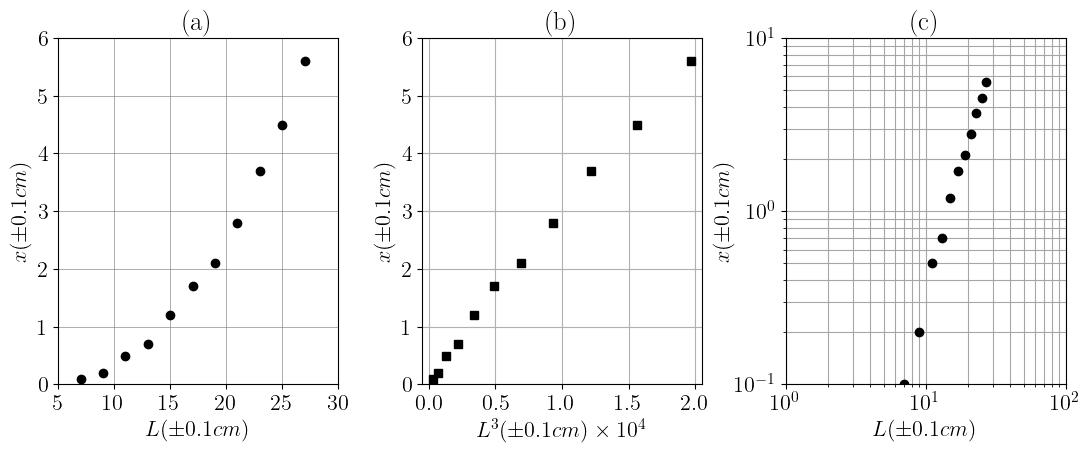

In [141]:
x = tabela2[['$$x(\pm0.1cm)$$']].values.reshape(-1)
L = tabela2[['$$L(\pm0.1cm)$$']].values.reshape(-1)
L3 = tabela2[['$$L^3(cm)$$']].values.reshape(-1).astype(float)
DL3 = tabela2[['$$\Delta L^3(cm)$$']].values.reshape(-1).astype(float)

# criamos a figura com 1 linha e 3 colunas com eixos correspondentes
fig, ax = plt.subplots(1,3, figsize=(13,4.5))


# x vs L escala linear
ax[0].plot(L,x, 'ko')
ax[0].set_ylabel(r'$x(\pm0.1 cm)$')
ax[0].set_xlabel(r'$L(\pm0.1 cm)$')
ax[0].grid()
ax[0].set_xticks(np.arange(5,35,5))
ax[0].set_yticks(np.arange(0,7,1))
ax[0].set_ylim(-0.0,6.0)
ax[0].set_title(r'(a)')

ax[0].grid(which='major', color='gray', linestyle='-', alpha=1, lw=0.45)
ax[0].grid(which='minor', color='r', linestyle='-', alpha=0.5, lw=0.25)


# x vs L^3 em escala linear
ax[1].plot(L3,x, 'ks')
ax[1].set_ylabel(r'$x(\pm0.1cm)$')
ax[1].set_xlabel(r'$L^3(\pm0.1 cm) \times 10^4$')
ax[1].grid()
ax[1].set_ylim(-0.0,6.0)
ax[1].set_xlim(-500,20500)
ax[1].set_xticks(np.arange(0,2.5,0.5)*1e4)
ax[1].set_xticklabels([rf"${x}$" for x in np.arange(0,2.5,0.5)])

ax[1].set_title(r'(b)')


# x vs L em escala log-log
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].plot(L,x, 'ko')
ax[2].set_xlim(1e-0,1e2)
ax[2].set_ylim(1e-1,1e1)
plt.grid(visible=True, which='both', color='0.65', linestyle='-')
ax[2].set_ylabel(r'$x(\pm0.1 cm)$', labelpad=-0.15)
ax[2].set_xlabel(r'$L(\pm0.1 cm)$')
ax[2].set_title(r'(c)')


fig.subplots_adjust(wspace=0.3, hspace=0.1)

### Discussão 

Note que o comportamento no primeiro caso (a) não é linear, enquanto que no segundo (b) e terceiro (c) ele é!



### Ajuste linear

Agora, vamos fazer um ajuste linear para encontrar os coeficientes angulares dos casos (b) e (c).

Começando com o caso (b). 

Nosso modelo é

$$ Y = \alpha X^3 + \beta$$

Vamos encontrar quem é o coeficiente angular $\alpha$.

In [138]:
# criamos um modelo de regressão linear relacionando x com L
def model_x_vs_L3(x, a, b):
    return a * x**3 + b

# agora, usando a função curve_fit, calcularemos os coeficientes e seus erros
coefs_lin, cov_lin = curve_fit(model_x_vs_L3, L, x)
coefs_err = np.sqrt(np.diag(cov_lin))

a = coefs_lin[0]
b = coefs_lin[1]
xfit = a * L**3 + b

a_err = coefs_err[0]
b_err = coefs_err[1]

# fitting y = ax + b
r2 = r2_score(xfit, x)
print(f" R-quadrado (o que nos diz quão bom é o nosso modelo): {r2}\n")

print(f" y = ax + b ->{a}x + {b} \n")
print(f" a = {a} +- {a_err} \n")
print(f" b = {b} +- {b_err} \n")
print(f" OBS: Note que os coeficientes não foram arredondados conforme seu erro! \n ")



 R-quadrado (o que nos diz quão bom é o nosso modelo): 0.9966287012652858

 y = ax + b ->0.0002835655767417317x + 0.1283685433507732 

 a = 0.0002835655767417317 +- 5.488212021925599e-06 

 b = 0.1283685433507732 +- 0.05114205914433377 

 OBS: Note que os coeficientes não foram arredondados conforme seu erro! 
 


Vamos arrendondar nossos coeficientes usando 1 algarismo significativo para seus erros 

(11,)

In [139]:
# algarismos significativos

ae1s = sigfig.round(a_err, sigfigs=1)
be1s = sigfig.round(b_err, sigfigs=1)

a1s = sigfig.round(str(a), str(ae1s), notation='scientific', sep=tuple)
b1s = sigfig.round(str(b), str(be1s), notation='scientific', sep=tuple)

print(f'a = {a1s[0]} +- {a1s[1]}')
print(f'b = {b1s[0]} +- {b1s[1]}')



a = 2.84E-4 +- 0.05E-4
b = 1.3E-1 +- 0.5E-1


Agora vamos graficar os os dados $x$ vs $L^3$ com o modelo linear

(-500.0, 20500.0)

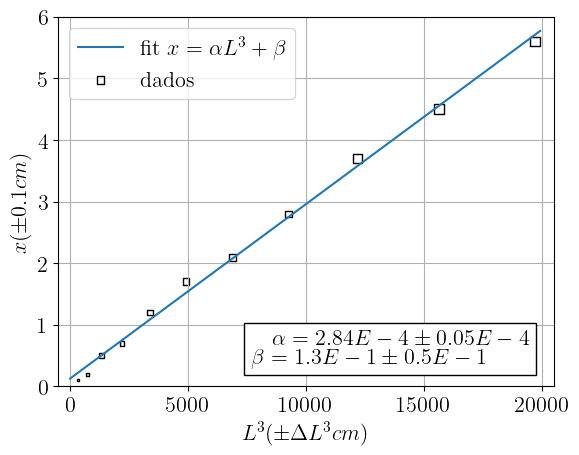

In [181]:
# graficando os pontos juntamente com o modelo
Ln = np.linspace(0, 27.1, 51)#*1e-2

figlr, axlr = plt.subplots()

#axlr.plot((L)**3, x, 'ko', label=r'dados')
axlr.plot(Ln**3, a*Ln**3 + b, label=r'fit $ x = \alpha L^3 + \beta$ ')
#axlr.errorbar(x=L**3, y=x, xerr=DL3, marker='s', mec='k', linestyle='None', ms=5, mfc='None', label='dados', ecolor='k')
# pontos proporcionais ao erro
axlr.scatter(x=L**3, y=x, s=0.25*DL3, marker='s',facecolors='None', edgecolors='k', label='dados')



axlr.text(0.95, 0.05, rf"$\alpha={a1s[0]} \pm {a1s[1]}$ \\ $\beta={b1s[0]} \pm {b1s[1]}$".format(100, 20), transform=axlr.transAxes, ha='right', va='bottom', ma='right', bbox=dict(boxstyle="square",ec='k',fc='w',))
#axlr.text(0.95, 0.05, rf"$\alpha={a1s.replace('E-4','')}$ \\ $\beta={b1s[0]} \pm {b1s[1]}$".format(100, 20), transform=axlr.transAxes, ha='right', va='bottom', ma='right', bbox=dict(boxstyle="square",ec='k',fc='w',))


leglr = axlr.legend()
axlr.set_ylabel(r'$x (\pm 0.1 cm)$')
axlr.set_xlabel(r'$L^3 (\pm \Delta L^3 cm)$')
axlr.grid()
axlr.set_ylim(-0.0,6.0)
axlr.set_xlim(-500,20500)

Agora, vamos estudar o caso log-log.

Lembramos que o nosso modelo agora tem duas variáveis $Y = \log(x)$ e $X = \log(L)$ e é dado por

$$ Y  = b + a X$$

e queremos encontrar $a \sim 3$



In [116]:
# criamos um modelo de regressão linear relacionando x com L
def model_logx_vs_logL(X, a, b):
    return a * X + b


# agora, usando a função curve_fit, calcularemos os coeficientes e seus erros
coefs_log, cov_log = curve_fit(model_logx_vs_logL, np.log(L), np.log(x))
coefslog_err = np.sqrt(np.diag(cov_log))


a = coefs_log[0]
b = coefs_log[1]
xfit = np.exp(b) * L**a

a_err = coefslog_err[0]
b_err = coefslog_err[1]

# fitting y = ax + b
r2 = r2_score(xfit, x)
print(f" R-quadrado (o que nos diz quão bom é o nosso modelo): {r2}\n")

print(f" Y = aX + b ->{a}X + {b} \n")
print(f" a = {a} +- {a_err} \n")
print(f" b = {b} +- {b_err} \n")
print(f" OBS: Note que os coeficientes não foram arredondados conforme seu erro! \n ")


 R-quadrado (o que nos diz quão bom é o nosso modelo): 0.9908096931612368

 Y = aX + b ->2.973194347359804X + -7.999049854860719 

 a = 2.973194347359804 +- 0.07603908069794471 

 b = -7.999049854860719 +- 0.21174308826435995 

 OBS: Note que os coeficientes não foram arredondados conforme seu erro! 
 


Agora, plotamos os dados versus o modelo

In [117]:
# veja que outro modelo é
def model_x_power_L(L,k,n):
    return k*np.power(L, n)

# agora, usando a função curve_fit, calcularemos os coeficientes e seus erros
coefs_log, cov_log = curve_fit(model_x_power_L, L, x)
coefslog_err = np.sqrt(np.diag(cov_log))


k = coefs_log[0]
n = coefs_log[1]
xfit = k*np.power(L, n)

k_err = coefslog_err[0]
n_err = coefslog_err[1]

# fitting y = ax + b
r2 = r2_score(xfit, x)
print(f" R-quadrado (o que nos diz quão bom é o nosso modelo): {r2}\n")

print(f" y = k L^n ->{k} L^{n} \n")
print(f" k = {k} +- {k_err} \n")
print(f" n = {n} +- {n_err} \n")
print(f" OBS: Note que os coeficientes não foram arredondados conforme seu erro! \n ")


 R-quadrado (o que nos diz quão bom é o nosso modelo): 0.9987836993325138

 y = k L^n ->0.0007425097580580143 L^2.708830038805005 

 k = 0.0007425097580580143 +- 0.00011371003876494253 

 n = 2.708830038805005 +- 0.04819343001265986 

 OBS: Note que os coeficientes não foram arredondados conforme seu erro! 
 


Text(0.5, 0, '$(L\\pm0.1)$cm')

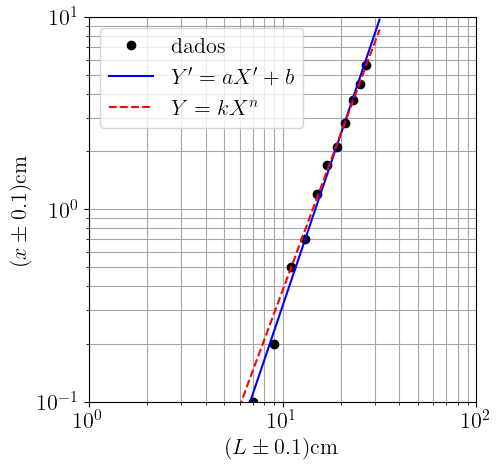

In [118]:
newL = np.logspace(-1, 1.5, 51, base=10)


figLL, axLL = plt.subplots(figsize=(5,5))
axLL.set_xscale('log')
axLL.set_yscale('log')
axLL.plot(L,x, 'ko', label=r'dados')

# note que ao retomar da escala log para a escala linear, o coeficiente original k = e^
axLL.plot(newL, np.exp(b)*newL**a, 'b-', label=r"$Y' = aX' + b$")
axLL.plot(newL, k*newL**n, 'r--', label=r"$Y = k {X}^n$")

leg = axLL.legend()

axLL.set_xlim(1e-0,1e2)
axLL.set_ylim(1e-1,1e1)
plt.grid(visible=True, which='both', color='0.65', linestyle='-')
axLL.set_ylabel(r'$(x\pm0.1)$cm')
axLL.set_xlabel(r'$(L\pm0.1)$cm')